# Police Militarization, State Crime, and the Use of Lethal Force
### Sunil Narayan

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
#Military Transfer Frame
MTF = pd.read_csv("data/MilitaryTranferSpreadsheet.csv")
#State Crime Frame
SCF = pd.read_csv("data/StateCrimeSpreadsheet.csv")
#Lethal Force Frame
LFF = pd.read_csv("data/LethalForceSpreadsheet.csv")

c:\users\sunil\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (2,15,35,37,38,39,40,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Research Questions

1. How has the use of lethal force by the police changed over time?
2. How has the crime rate changed over time?
3. Has the increase in funding for equipment correlated with a change in either of these trends?

## Preparing Datasets

In [2]:
MTF = MTF.loc[:,['Cost', 'Ship Date']]

In [3]:
MTF['Ship Date'] = MTF['Ship Date'].str[-4:]

In [4]:
MTF['Ship Date'] = MTF['Ship Date'].astype(int)

In [5]:
MTF = MTF.rename(columns = {"Ship Date" : "Year"})

In [6]:
MTF = MTF[MTF.Year>=2000]
MTF = MTF[MTF.Year<=2014]

In [7]:
MTF = MTF.groupby('Year', as_index = False).sum()

In [8]:
MTF.head(16)

Year          Cost
0   2000  7.063179e+06
1   2001  3.175171e+06
2   2002  2.427223e+06
3   2003  9.652189e+06
4   2004  5.990546e+06
5   2005  1.021858e+07
6   2006  3.071283e+07
7   2007  1.209909e+07
8   2008  4.017015e+07
9   2009  2.640902e+07
10  2010  9.233584e+07
11  2011  2.292751e+08
12  2012  1.540293e+08
13  2013  2.941343e+08
14  2014  7.968174e+08

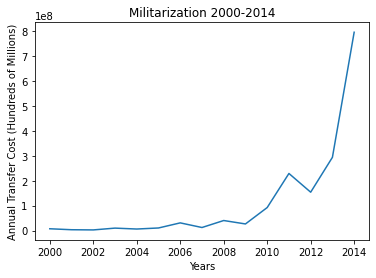

In [9]:
x = MTF["Year"]
y = MTF["Cost"]

plt.title('Militarization 2000-2014')
plt.xlabel('Years')
plt.ylabel('Annual Transfer Cost (Hundreds of Millions)')

plt.plot(x,y)
plt.show()

In [10]:
SCF = SCF.loc[:,['report_year', 'violent_crimes']]

In [11]:
SCF = SCF.rename(columns = {"report_year" : "Year", "violent_crimes" : "Crimes"})

In [12]:
SCF = SCF[SCF.Year>=2000]
SCF = SCF[SCF.Year<=2014]

In [13]:
SCF = SCF.groupby('Year', as_index = False).sum()

In [14]:
SCF.head(16)

Year     Crimes
0   2000  1999863.0
1   2001  2014008.0
2   2002  1985342.0
3   2003  1917072.0
4   2004  1873245.0
5   2005  1906871.0
6   2006  1957346.0
7   2007  1934105.0
8   2008  1892222.0
9   2009  1789882.0
10  2010  1689509.0
11  2011  1630009.0
12  2012  1646202.0
13  2013  1590805.0
14  2014  1574333.0

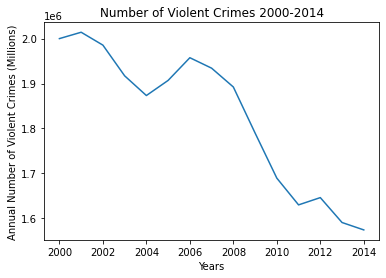

In [15]:
x = SCF["Year"]
y = SCF["Crimes"]

plt.title('Number of Violent Crimes 2000-2014')
plt.xlabel('Years')
plt.ylabel('Annual Number of Violent Crimes (Millions)')

plt.plot(x,y)
plt.show()

In [16]:
LFF = LFF.loc[:,['Date of injury resulting in death (month/day/year)']]

In [17]:
LFF = LFF.rename(columns = {"Date of injury resulting in death (month/day/year)" : "Year"})

In [18]:
LFF['Year'] = LFF['Year'].str[-4:]
LFF['Year'] = LFF['Year'].astype(int)

In [19]:
LFF = LFF[LFF.Year>=2000]
LFF = LFF[LFF.Year<=2014]

In [20]:
LFF = LFF.Year.value_counts().to_frame()

In [21]:
LFF = LFF.reset_index()

In [22]:
LFF = LFF.rename(columns = {"Year":"Deaths" })
LFF = LFF.rename(columns = {"index":"Year" })

In [23]:
LFF = LFF.sort_values("Year")

In [24]:
LFF.head(16)

Year  Deaths
14  2000     860
13  2001     923
12  2002     987
10  2003    1061
11  2004    1037
9   2005    1169
5   2006    1270
7   2007    1257
8   2008    1211
6   2009    1259
4   2010    1295
3   2011    1407
2   2012    1487
0   2013    1781
1   2014    1711

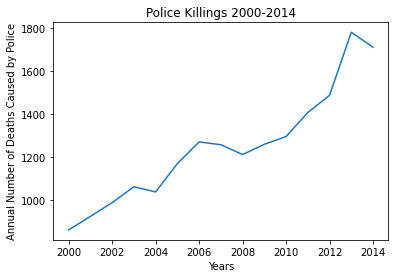

In [25]:
x = LFF["Year"]
y = LFF["Deaths"]

plt.title('Police Killings 2000-2014')
plt.xlabel('Years')
plt.ylabel('Annual Number of Deaths Caused by Police')

plt.plot(x,y)
plt.show()

## Visualizing Data

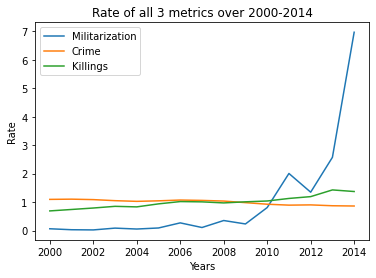

In [26]:
x = MTF["Year"]
y = MTF["Cost"]/MTF["Cost"].mean()
x2 = SCF["Year"]
y2 = SCF["Crimes"]/SCF["Crimes"].mean()
x3 = LFF["Year"]
y3 = LFF["Deaths"]/LFF["Deaths"].mean()

plt.xlabel("Years")
plt.ylabel("Rate")
plt.title("Rate of all 3 metrics over 2000-2014")
plt.plot(x,y,label="Militarization")
plt.plot(x2,y2,label="Crime")
plt.plot(x3,y3,label="Killings")
plt.legend()
plt.show()

## Answering Q1

How has the use of lethal force by the police changed over time?

In [27]:
LFF2 = pd.read_csv("data/LethalForceSpreadsheet.csv")
LFF2 = LFF2.loc[:,['Date of injury resulting in death (month/day/year)']]
LFF2 = LFF2.rename(columns = {"Date of injury resulting in death (month/day/year)" : "Year"})
LFF2['Year'] = LFF2['Year'].str[-4:]
LFF2['Year'] = LFF2['Year'].astype(int)

c:\users\sunil\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (2,15,35,37,38,39,40,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
LFF2 = LFF2.Year.value_counts().to_frame()
LFF2 = LFF2.reset_index()
LFF2 = LFF2.rename(columns = {"Year":"Deaths" })
LFF2 = LFF2.rename(columns = {"index":"Year" })
LFF2 = LFF2.sort_values("Year")
LFF2 = LFF2[LFF2.Year>=2000]
LFF2 = LFF2[LFF2.Year<=2020]

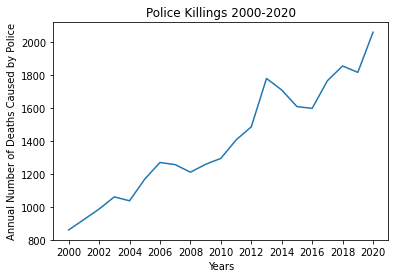

In [29]:
x = LFF2["Year"]
y = LFF2["Deaths"]

plt.title('Police Killings 2000-2020')
plt.xlabel('Years')
plt.ylabel('Annual Number of Deaths Caused by Police')

plt.plot(x,y)
plt.xticks(range(2000, 2021, 2))
plt.show()

In [30]:
stats.pearsonr(LFF2["Deaths"], LFF2["Year"])

(0.9708353382237427, 3.046295545058456e-13)

Answer: Seems to be a strong upward trend in deaths per year over time. Note, however, that this is not data stretching back before the creation of the 1033 program, so we don't know if this is a new trend or the continuation of an existing one.

## Answering Q2

How has the crime rate changed over time?

In [31]:
SCF2 = pd.read_csv("data/StateCrimeSpreadsheet.csv")

In [32]:
SCF2 = SCF2.loc[:,['report_year', 'violent_crimes']]
SCF2 = SCF2.rename(columns = {"report_year" : "Year", "violent_crimes" : "Crimes"})
SCF2 = SCF2.groupby('Year', as_index = False).sum()

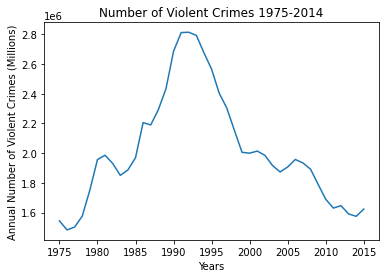

In [33]:
x = SCF2["Year"]
y = SCF2["Crimes"]

plt.title('Number of Violent Crimes 1975-2014')
plt.xlabel('Years')
plt.ylabel('Annual Number of Violent Crimes (Millions)')

plt.plot(x,y)
plt.show()

This is fascinating, as it seems to show that the crime rate peaked in the 90's and has fallen since then. New question: did this reversal happen as a result of instituting the 1033 program?

In [34]:
Post1033 = SCF2[SCF2.Year>=1997]
Pre1033 = SCF2[SCF2.Year<=1997]

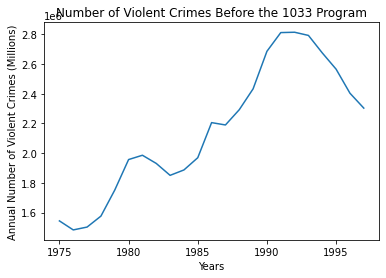

In [35]:
x = Pre1033["Year"]
y = Pre1033["Crimes"]

plt.title('Number of Violent Crimes Before the 1033 Program')
plt.xlabel('Years')
plt.ylabel('Annual Number of Violent Crimes (Millions)')

plt.plot(x,y)
plt.show()

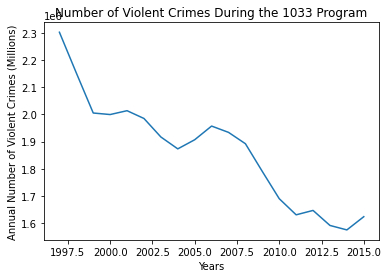

In [36]:
x = Post1033["Year"]
y = Post1033["Crimes"]

plt.title('Number of Violent Crimes During the 1033 Program')
plt.xlabel('Years')
plt.ylabel('Annual Number of Violent Crimes (Millions)')

plt.plot(x,y)
plt.show()

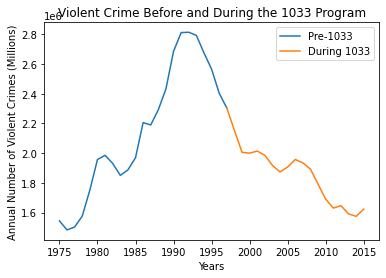

In [37]:
x = Pre1033["Year"]
y = Pre1033["Crimes"]
x2 = Post1033["Year"]
y2 = Post1033["Crimes"]

plt.xlabel("Years")
plt.ylabel("Annual Number of Violent Crimes (Millions)")
plt.title("Violent Crime Before and During the 1033 Program")
plt.plot(x,y,label="Pre-1033")
plt.plot(x2,y2,label="During 1033")
plt.legend()
plt.show()

It seems that the downward trend in crime since instituting the program is a continuation of a crime rate which was already falling, let's zoom in on that part:

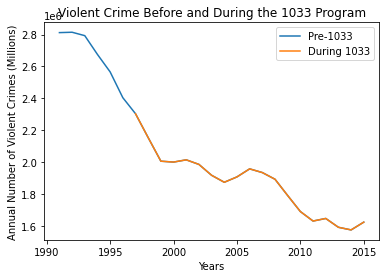

In [38]:
Post1033 = SCF2[SCF2.Year>=1997]
Pre1033 = SCF2[SCF2.Year<=1997]
Pre1033 = SCF2[SCF2.Year>=1991]

x = Pre1033["Year"]
y = Pre1033["Crimes"]
x2 = Post1033["Year"]
y2 = Post1033["Crimes"]

plt.xlabel("Years")
plt.ylabel("Annual Number of Violent Crimes (Millions)")
plt.title("Violent Crime Before and During the 1033 Program")
plt.plot(x,y,label="Pre-1033")
plt.plot(x2,y2,label="During 1033")
plt.legend()
plt.show()

New question: was the fall in crime from 1997-2015 caused by the 1033 program, or was it an extension of the fall that had already begun in 1991?

In [39]:
stats.pearsonr(Pre1033["Crimes"], Pre1033["Year"])

(-0.9438789638122997, 1.4927193302739846e-12)

In [40]:
stats.pearsonr(Post1033["Crimes"], Post1033["Year"])

(-0.94372258752651, 1.3612923475724907e-09)

The corrilation between crime rate and time seems to be very similar before (-0.9439) and after (-0.9437) the start of the 1033 program. This is not techically a statistically significant test, but based on that as well as the shape of the graph, it does seem like the program did not cause a significant difference in the rate of change of crime over time

Note that the [NDAA for 1991](https://www.govtrack.us/congress/bills/101/hr2461/text) (see section 1208) contained the precursor for the 1033 program, which is a possible explaination for the decrease in crime starting that year, and thus validating the transfer of small arms as a viable means of combating crime

New question: if we expand the scope of "police militarization" to include all DoD transfers, not just those under the 1033 program but also under its precursor, the 1208 program, does the data show a difference between the pre-transfer and post-transfer crime rate?

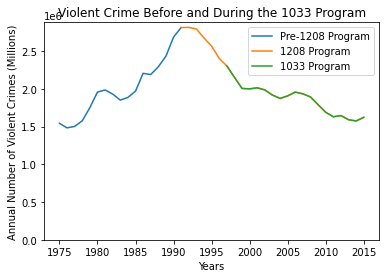

In [41]:
During1033 = SCF2[SCF2.Year>=1997]
During1208 = SCF2[SCF2.Year<=1997]
During1208 = SCF2[SCF2.Year>=1991]
Pre1208 = SCF2[SCF2.Year<=1991]


x = Pre1208["Year"]
y = Pre1208["Crimes"]
x2 = During1208["Year"]
y2 = During1208["Crimes"]
x3 = During1033["Year"]
y3 = During1033["Crimes"]

plt.xlabel("Years")
plt.ylabel("Annual Number of Violent Crimes (Millions)")
plt.title("Violent Crime Before and During the 1033 Program")
plt.plot(x,y,label="Pre-1208 Program")
plt.plot(x2,y2,label="1208 Program")
plt.plot(x3,y3,label="1033 Program")
plt.yticks(range(0, 3000000, 500000))
plt.legend()
plt.show()


Including the 1280 program seems to provide a much stronger case for militarization stopping violent crime, as evidenced by the obvious downward shift in crime through its duration and into the duration of the 1033 program. 

New Question: Is it warrented to classify the 1208 program as a legitimate force on the level of the 1033 program despite its limited scope?

Some background here: the 1208 program was more stringent in how equipment was to be approved to be transferred, thus making it a weaker force contributing to militarization than the 1033 program. In order to measure the difference, lets look at the total cost of transfers per year from 1991 (the start of the 1208 program) to the present day.

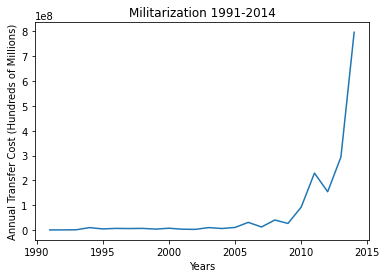

In [42]:
MTF2 = pd.read_csv("data/MilitaryTranferSpreadsheet.csv")
MTF2 = MTF2.loc[:,['Cost', 'Ship Date']]
MTF2['Ship Date'] = MTF2['Ship Date'].str[-4:]
MTF2['Ship Date'] = MTF2['Ship Date'].astype(int)
MTF2 = MTF2.rename(columns = {"Ship Date" : "Year"})
MTF2 = MTF2[MTF2.Year<=2014]
MTF2 = MTF2.groupby('Year', as_index = False).sum()\

x = MTF2["Year"]
y = MTF2["Cost"]

plt.title('Militarization 1991-2014')
plt.xlabel('Years')
plt.ylabel('Annual Transfer Cost (Hundreds of Millions)')

plt.plot(x,y)
plt.show()

In looking for a difference between the levels of militarization under the 1208 program and the 1033 program, there doesnt appear to be a significant difference between the years of 1991-1997 and 1997-2005. The major feature of this graph is the drastic increase in transfers from the late 2000's onwards,  but this happens well after the start of the 1033 program. For the purposes of determining if the negative corrilation between militarizaion and crime levels should be disqualified based on being part of a previous trend, this graph shows that the years of 1991-1997 should not be treated as catagorically different than the years of 1997 onwards.  

## Answering Q3

Has the increase in funding for military equipment correlated with a change in either of these trends?

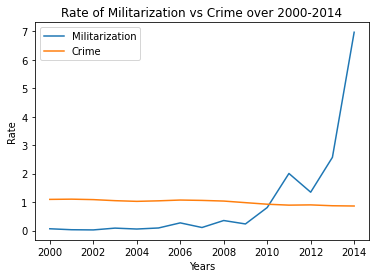

In [43]:
x = MTF["Year"]
y = MTF["Cost"]/MTF["Cost"].mean()
x2 = SCF["Year"]
y2 = SCF["Crimes"]/SCF["Crimes"].mean()

plt.xlabel("Years")
plt.ylabel("Rate")
plt.title("Rate of Militarization vs Crime over 2000-2014")
plt.plot(x,y,label="Militarization")
plt.plot(x2,y2,label="Crime")
plt.legend()
plt.show()

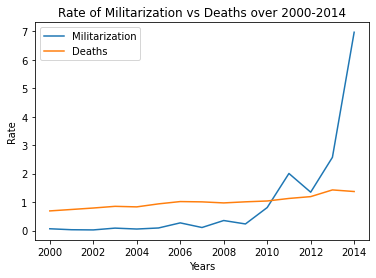

In [44]:
x = MTF["Year"]
y = MTF["Cost"]/MTF["Cost"].mean()
x2 = LFF["Year"]
y2 = LFF["Deaths"]/LFF["Deaths"].mean()

plt.xlabel("Years")
plt.ylabel("Rate")
plt.title("Rate of Militarization vs Deaths over 2000-2014")
plt.plot(x,y,label="Militarization")
plt.plot(x2,y2,label="Deaths")
plt.legend()
plt.show()

In [45]:
CrimeCorrilation = stats.pearsonr(MTF["Cost"], SCF["Crimes"])
DeathsCorrilation = stats.pearsonr(MTF["Cost"], LFF["Deaths"])

In [46]:
print("The corrilation between the annual amount of military equipment transferred and state crime rate is:", CrimeCorrilation)
print("The corrilation between the annual amount of military equipment transferred and rate of lethal force is", DeathsCorrilation)

The corrilation between the annual amount of military equipment transferred and state crime rate is: (-0.7433680761523075, 0.0014921185209890435)
The corrilation between the annual amount of military equipment transferred and rate of lethal force is (0.7614336024642523, 0.000973761918409527)


Answer: Yes, the increase in the amount of military equipment transferred over time has corrilated with both a statistically significant decrease in the crime rate and a statistically significant increase in the number of police uses of lethal force

## Discussion

Fundamentally, this analysis was supposed to create a better understanding of whether or not the police system in America needs to be changed to reflect the dangers of increased militarization. While it does seem that the answer to question 3 proves that increased militarization correlates with a decrease in crime an increase in the use of lethal force, I do not believe that this study proves a causal relationship strong enough to make prescriptive statements about changing the police system in America one way or another.

In order to make a strong normative statement about police killings, I would need to find data from police killings before any militarization took place to determine if the militarization is what caused the killings to increase or simply coincided with an increase in killings caused by some other factor. This is not a problem I had with state crime, as the answer to question 2 shows that the correlation between police militarization and a drop in violent crime is likely not the product of riding a previously established trend.

This may seem to suggest that "I can't say for sure that police militarization causes increased killings, but question 2 indicates that it likely causes a decrease in crime. Police militarization is thus justified." I vehemently disagree with this logic. Recall that the arguments for and against militarization are varied. Even if this study proved that the relationship between militarization crime is a causal one (which, as previously specified, it does not), proponents of these programs would still have to contend with the psychological anguish caused by marching around supposedly peaceful cities with military equipment, the impact of which is much tougher to quantify. In order to actually justify the continued existance of the 1033 program, I would need to find more data to point to the idea that police militarization is specifically accomplishing its goal of ending the threat of drug crime, or that it has negligable pysocological effects on both the police and the community at large.

I thus assert that this study has accomplished its goal of providing a better understanding as to the correlation between police militarization, violent crime, and police killings, but is inconclusive as to the normative judgement of whether or not these trends definitively warrant change. With a better understanding of how these factors have changed over time, each of us individually has to make a decision about what we think justice looks like, and how much risk we are willing to take in order to bring about that justice.


## Links to Works Used

Substantive data set describing the use of police violence over the past 20 years 
[Lethal force dataset](https://docs.google.com/spreadsheets/d/1dKmaV_JiWcG8XBoRgP8b4e9Eopkpgt7FL7nyspvzAsE/edit#gid=0)

National crime rate data seta
[Violent crime dataset](https://www.kaggle.com/marshallproject/crime-rates)

Dataset of transfers of military equipment from 1991-2015
[Militarization data set](https://github.com/washingtonpost/data-1033-program/blob/master/1033.csv)

Individual study on militarization vs violence in Nevada 
[Delehanty et al.](https://journals.sagepub.com/doi/full/10.1177/2053168017712885)

Congressional report on 1033 program
[1033 program](https://apps.dtic.mil/sti/pdfs/ADA609611.pdf)

Text of the 1991 National Defense Authorization Act
[1991 NDAA](https://www.govtrack.us/congress/bills/101/hr2461/text)

Study showing that protests are caused by higher rates of police violence
[Cambridge](https://www.cambridge.org/core/journals/perspectives-on-politics/article/black-lives-matter-evidence-that-policecaused-deaths-predict-protest-activity/BFA2E74F4BCB25C3C222807E8B1111D4)

**You will need university login for these 2:**  
Study describing militarization and its impacts
[Steidley et al.](https://onlinelibrary.wiley.com/doi/full/10.1111/soc4.12674?casa_token=hGOq_J7fQ4oAAAAA%3Anl9UFTAEvia63GFo4IsszioZnr1ZxT65Q-BKvspyBYDGinAdON5PPk3wNG46syOK0xzU2D_4COd1Bo6h)

Study reviewing how police and civilians feel about militarization
[Surveys](https://journals.sagepub.com/doi/full/10.1177/0011128718770689?casa_token=lCpAMYd_XGAAAAAA%3A-fEebmBACaGZk6oNqc6vE-Mezj-d7p_rKRpR39jui-7eC1UPZDDSb4KbQ0KBxY-Acoz9nWjJuCbl1w)